In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Example with Making Blobs

''

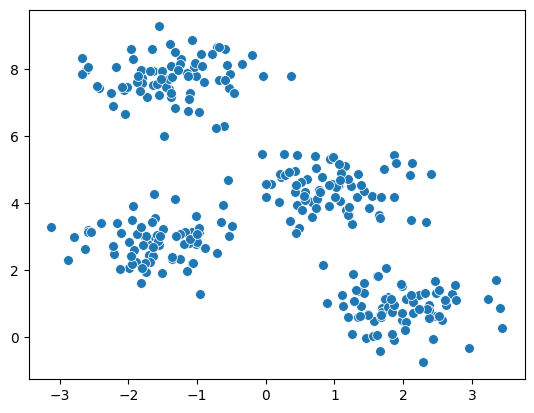

In [2]:
X, y_true = make_blobs(
        n_samples=300,
        centers=4,
        cluster_std=0.60,
        random_state=0,
)
# plt.scatter(X[:, 0], X[:, 1], s=50, );
sns.scatterplot(x = X[:, 0], y = X[:, 1], s=50) ;
;

## KMeans

In [3]:
kmeans = KMeans(n_clusters=4, n_init=10).fit(X)
kmeans.labels_


array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2], d

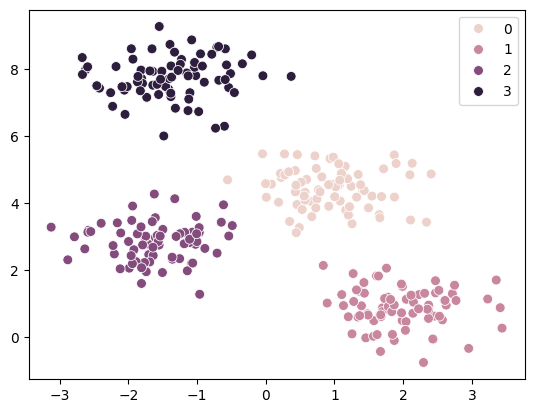

In [4]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmeans.labels_, s=50) ;


## Example with Pima Indians Dataset

In [5]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
url = "https://ddc-datascience.s3.amazonaws.com/pima-indians-diabetes.csv"
pima = pd.read_csv( url, header=None, names=col_names)
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima["label"].value_counts()


label
0    500
1    268
Name: count, dtype: int64

In [7]:
# Drop the label & some of the other variables for simplicity
pima_X = pima.drop(['label', 'skin', 'pedigree', 'bp'], axis = 1).copy()
pima_X.head()


,pregnant,glucose,insulin,bmi,age
0,6,148,0,33.6,50
1,1,85,0,26.6,31
2,8,183,0,23.3,32
3,1,89,94,28.1,21
4,0,137,168,43.1,33


In [8]:
# Scale data
scaler = MinMaxScaler()
scaler.fit(pima_X)
pima_X_scaled = scaler.transform(pima_X)
# Convert back to data frame
pima_X_scaled = pd.DataFrame(pima_X_scaled, columns = pima_X.columns)
pima_X_scaled.head()


,pregnant,glucose,insulin,bmi,age
0,0.352941,0.743719,0.000000,0.500745,0.483333
1,0.058824,0.427136,0.000000,0.396423,0.166667
2,0.470588,0.919598,0.000000,0.347243,0.183333
3,0.058824,0.447236,0.111111,0.418778,0.000000
4,0.000000,0.688442,0.198582,0.642325,0.200000


## KMeans

In [9]:
# Fit k-means w/ 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10).fit(pima_X_scaled)
kmeans.labels_


array([1, 2, 3, 2, 0, 2, 2, 3, 0, 1, 2, 3, 3, 0, 1, 3, 0, 3, 2, 2, 0, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 1, 0, 2, 2, 3, 2, 3, 3, 2, 1, 0, 3, 3, 3,
       3, 0, 2, 2, 3, 2, 2, 2, 2, 1, 3, 2, 0, 2, 0, 2, 2, 3, 2, 0, 3, 2,
       2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 2, 0, 3, 1, 2, 3, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 3, 2, 2, 3, 1, 3, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 3,
       0, 3, 2, 0, 2, 2, 2, 0, 1, 3, 2, 3, 0, 2, 3, 2, 1, 2, 0, 2, 3, 0,
       3, 3, 2, 2, 2, 3, 0, 3, 0, 2, 2, 3, 2, 2, 2, 2, 3, 0, 2, 2, 2, 3,
       3, 0, 1, 3, 2, 2, 2, 2, 1, 3, 1, 2, 3, 0, 2, 3, 3, 3, 3, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 3, 2, 0, 1, 0, 3, 3, 2, 3, 2, 3,
       0, 1, 3, 1, 2, 2, 2, 0, 0, 2, 0, 3, 2, 2, 2, 0, 1, 0, 3, 2, 2, 2,
       2, 3, 0, 3, 3, 0, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 0, 3, 0, 2, 2, 1,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 1, 2, 0, 3, 3, 1, 1, 1,
       0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 3, 1, 0,

In [10]:
# Add a new column to pima_X_scaled with the cluster assignment
pima_X_scaled['cluster'] = kmeans.labels_
pima_X_scaled['cluster'].value_counts()


cluster
2    366
3    171
0    153
1     78
Name: count, dtype: int64

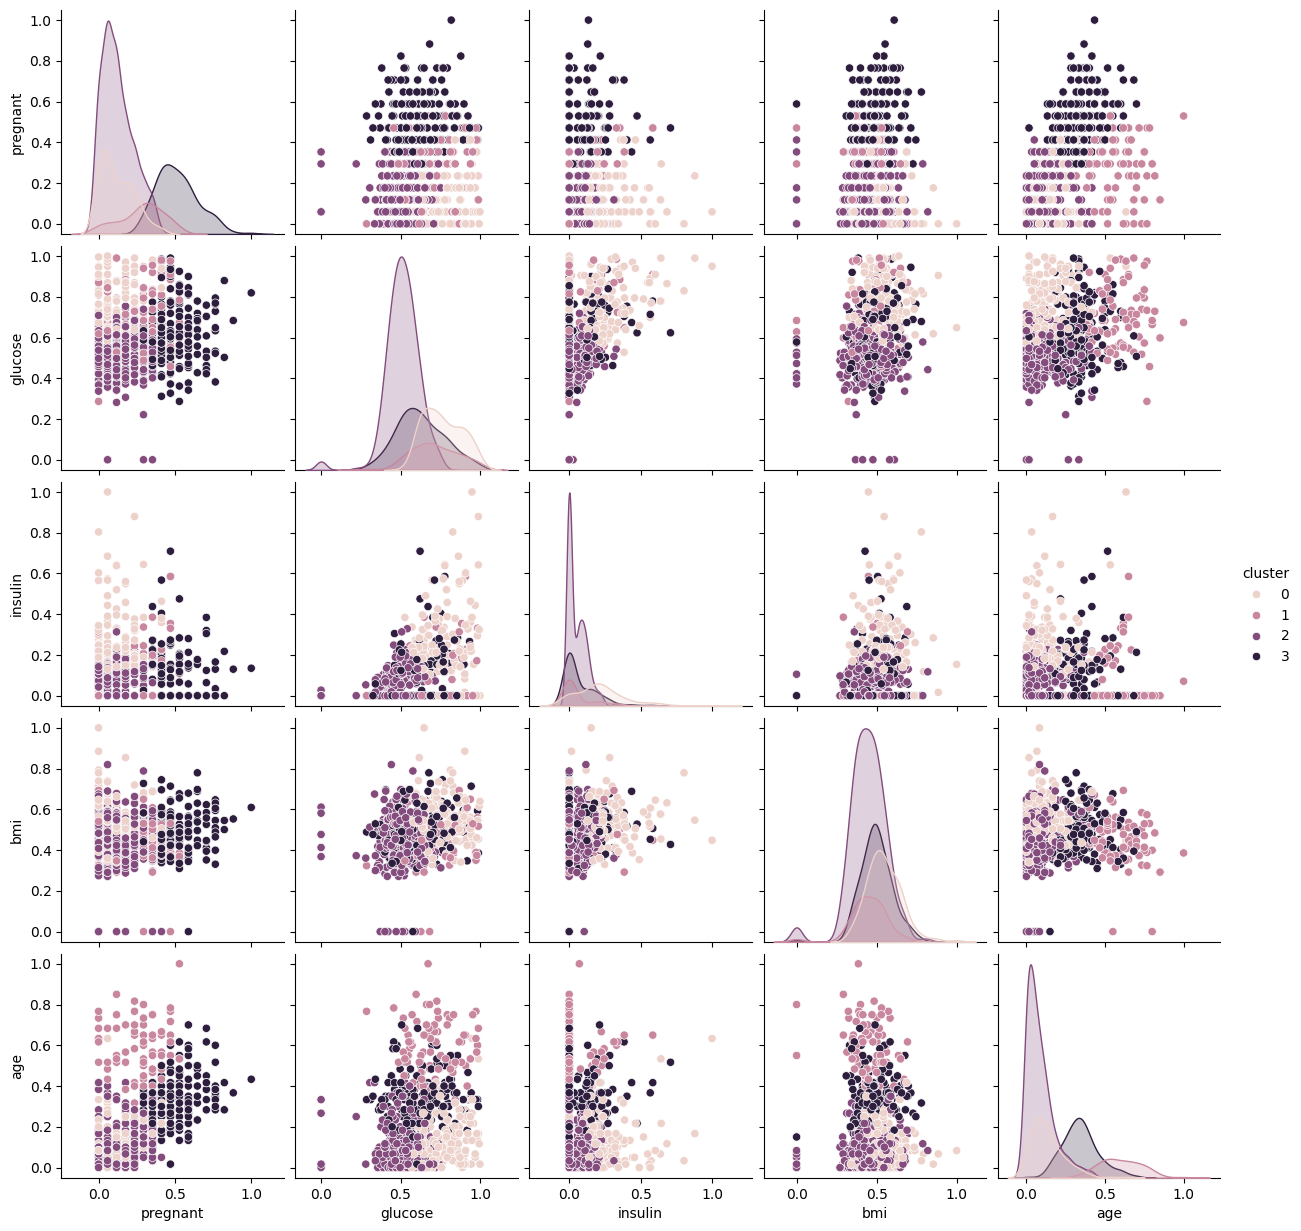

In [11]:
sns.pairplot(pima_X_scaled, hue='cluster') ;


## Choosing K - the elbow method

In [12]:
# Drop cluster column
pima_X_scaled.drop('cluster', axis = 1, inplace = True)


In [13]:
distortions = []
K = range(1,100)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init = 10)
    kmeans.fit(pima_X_scaled)
    distortions.append(kmeans.inertia_)


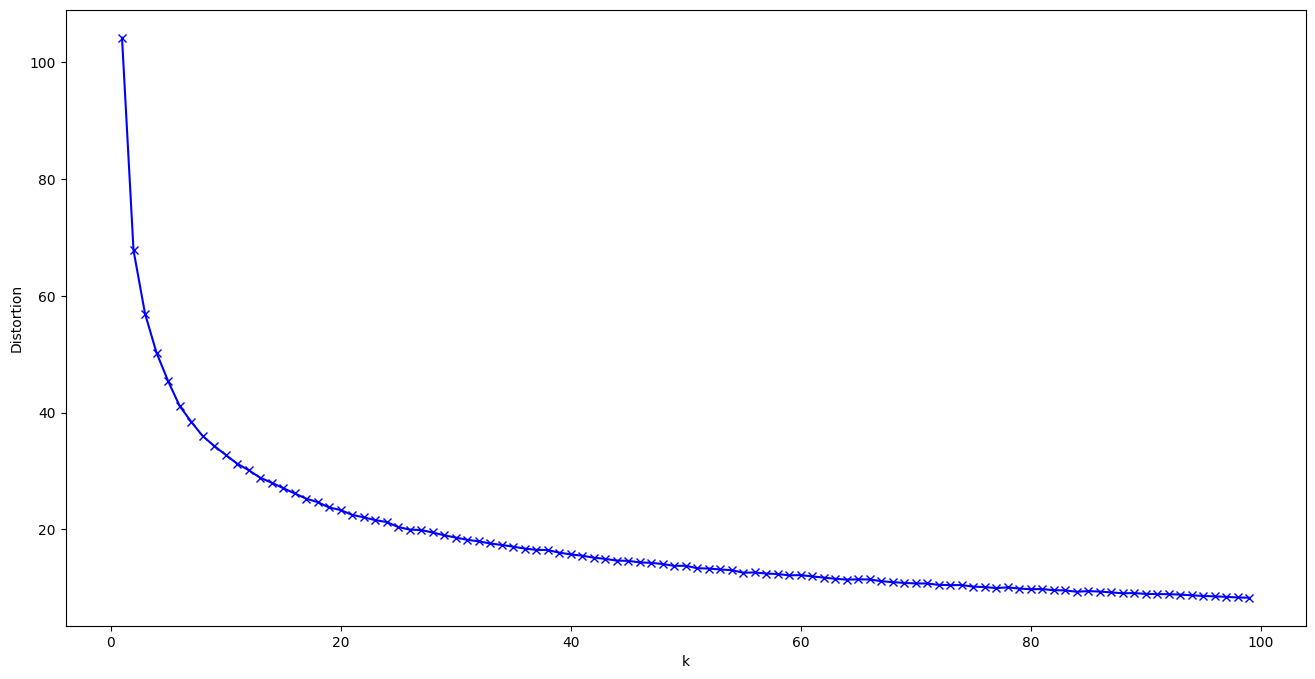

In [14]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()


In [15]:
%%capture
!pip install -U yellowbrick


In [16]:
from yellowbrick.cluster.elbow import kelbow_visualizer


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

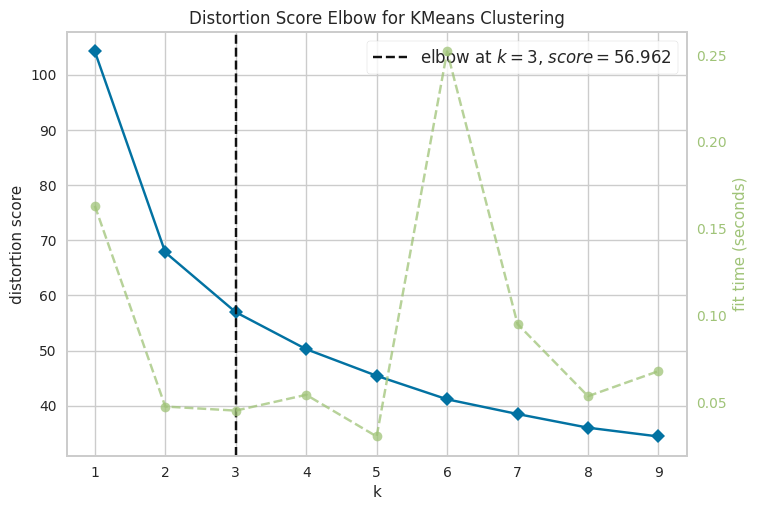

''

In [17]:
# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4, n_init=10), pima_X_scaled, k=(1,10)) ;
;

# Fit again with k = 3

In [18]:
kmeans = KMeans(n_clusters=3, n_init=10).fit(pima_X_scaled)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

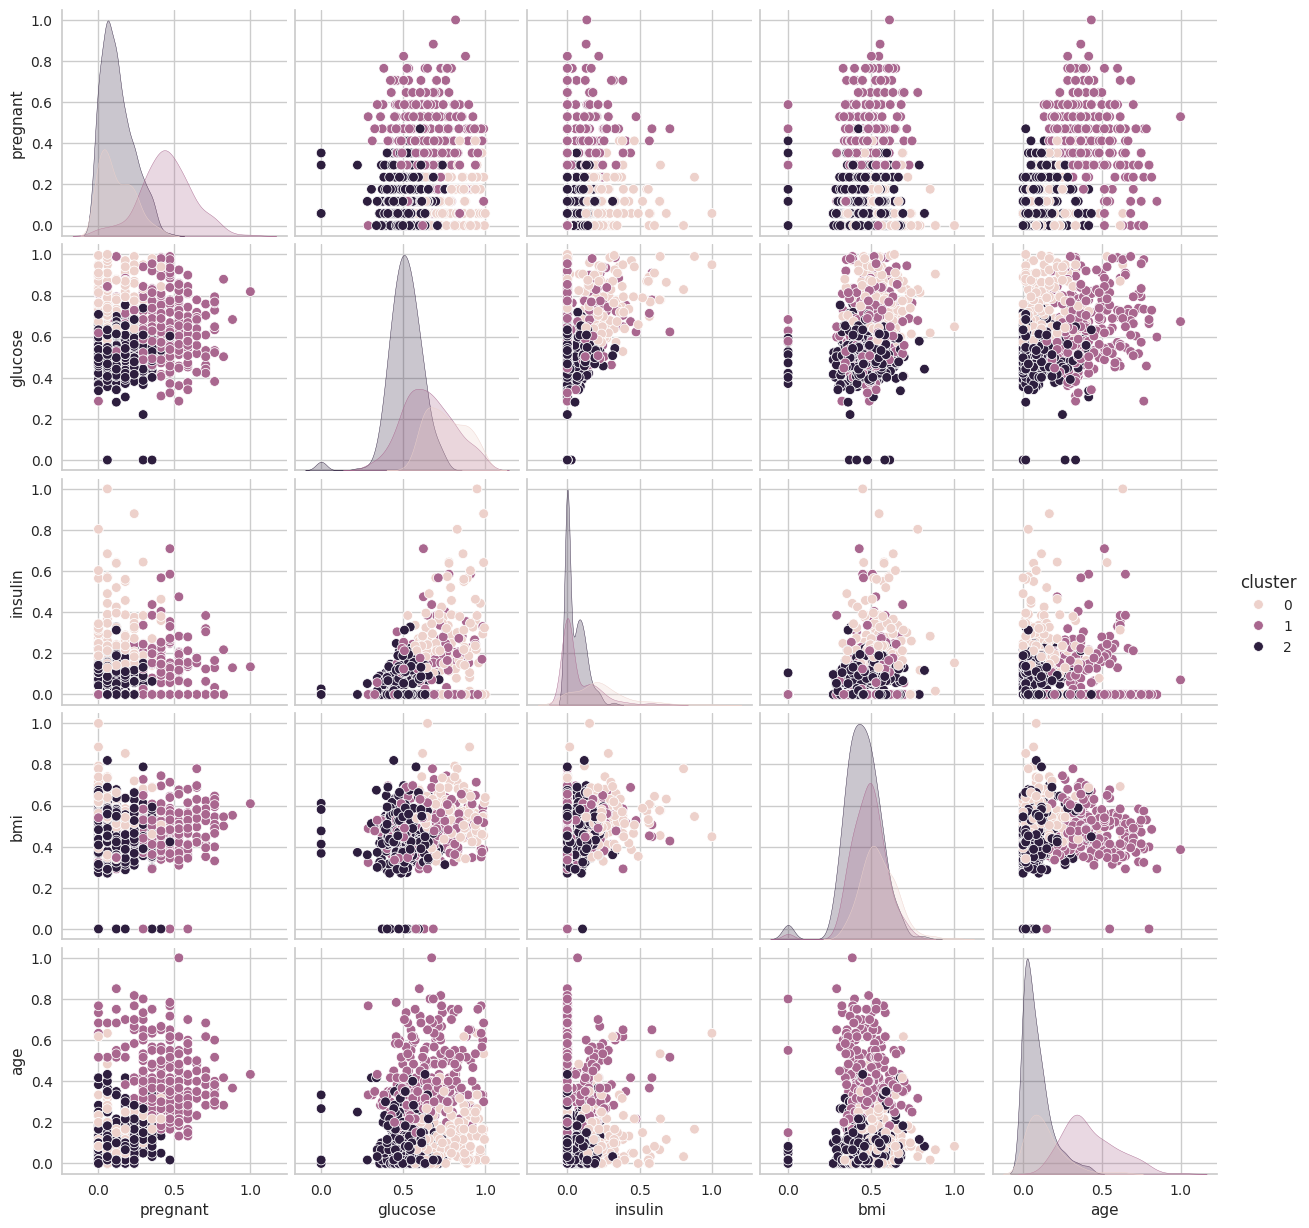

In [19]:
sns.pairplot(pima_X_scaled.assign(cluster=kmeans.labels_), hue='cluster') ;
